In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files


In [2]:
uploaded = files.upload()

Saving Screenshot 2025-05-09 190514.png to Screenshot 2025-05-09 190514.png


In [5]:
uploaded_filename = list(uploaded.keys())[0]

image = cv2.imread(uploaded_filename)

if image is None:
    print(f"Error: Could not load image from {uploaded_filename}. Please check the filename and ensure the file was uploaded correctly.")
else:

    image = cv2.resize(image, (400, 400))
    print("Image loaded and resized successfully.")

Image loaded and resized successfully.


In [6]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [7]:
# White: high V, low S
white_lower = np.array([0, 0, 200])
white_upper = np.array([180, 55, 255])

# Green
green_lower = np.array([36, 50, 70])
green_upper = np.array([89, 255, 255])

# Blue
blue_lower = np.array([90, 50, 70])
blue_upper = np.array([128, 255, 255])

In [8]:
mask_white = cv2.inRange(hsv, white_lower, white_upper)
mask_green = cv2.inRange(hsv, green_lower, green_upper)
mask_blue = cv2.inRange(hsv, blue_lower, blue_upper)


In [9]:
result_white = cv2.bitwise_and(image, image, mask=mask_white)
result_green = cv2.bitwise_and(image, image, mask=mask_green)
result_blue = cv2.bitwise_and(image, image, mask=mask_blue)


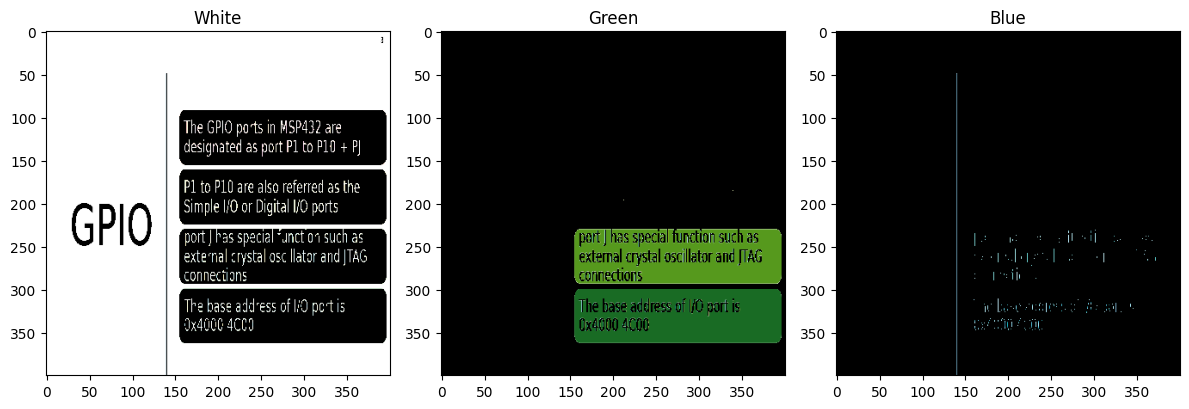

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(result_white, cv2.COLOR_BGR2RGB))
plt.title("White")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(result_green, cv2.COLOR_BGR2RGB))
plt.title("Green")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_blue, cv2.COLOR_BGR2RGB))
plt.title("Blue")

plt.tight_layout()
plt.show()